In [1]:
import numpy as operador
import pandas as pan




churn_df = pan.read_csv('./telecom_churn_clean.csv')
churn_df.head(10)


Unnamed: 0  account_length  area_code  international_plan  voice_mail_plan  \
0           0             128        415                   0                1   
1           1             107        415                   0                1   
2           2             137        415                   0                0   
3           3              84        408                   1                0   
4           4              75        415                   1                0   
5           5             118        510                   1                0   
6           6             121        510                   0                1   
7           7             147        415                   1                0   
8           8             117        408                   0                0   
9           9             141        415                   1                1   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   
5                      0              223.4               98   
6                     24              218.2               88   
7                      0              157.0               79   
8                      0              184.5               97   
9                     37              258.6               84   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   
5             37.98              220.6              101             18.75   
6             37.09              348.5              108             29.62   
7             26.69              103.1               94              8.76   
8             31.37              351.6               80             29.89   
9             43.96              222.0              111             18.87   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   
5                203.9                118                9.18   
6                212.6                118                9.57   
7                211.8                 96                9.53   
8                215.8                 90                9.71   
9                326.4                 97               14.69   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   
5                 6.3                 6               1.70   
6                 7.5                 7               2.03   
7                 7.1                 6               1.92   
8                 8.7                 4               2.35   
9                11.2                 5               3.02   

   customer_service_calls  churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                  

In [2]:
from sklearn.neighbors import KNeighborsClassifier

# AINDA USANDO O NUMPY

X = churn_df[["total_day_charge", "total_eve_charge"]].values
Y = churn_df["churn"].values

print(X.shape, Y.shape)

(3333, 2) (3333,)


In [3]:
# USANDO SKLEARN

knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X,Y)

KNeighborsClassifier(n_neighbors=20)

In [4]:
novoX = operador.array([
    [56.8, 17.5],
    [24.4,24.1],
    [50.1, 10.9]
])

predicaoY = knn.predict(novoX)

print("Predições: {}".format(predicaoY))

Predições: [1 0 0]


Exercício

In [5]:
from sklearn.neighbors import KNeighborsClassifier 

valorChurn = churn_df["churn"].values

dadosContaCliente = churn_df[["account_length", "customer_service_calls"]].values

vizinhos = KNeighborsClassifier(n_neighbors=6)

vizinhos.fit(dadosContaCliente, valorChurn)



KNeighborsClassifier(n_neighbors=6)

In [6]:
novosDados = operador.array([
    [30.0, 17.5],
    [107.0, 24.1],
    [213.0, 10.9]
])

predicao_churn = vizinhos.predict(novosDados)

print(format(predicao_churn))

[0 1 0]


In [1]:
from sklearn.model_selection import train_test_split

treinoX, testeX, treinoY, testeY = train_test_split(X, Y, test_size=0.3, random_state=21, stratify=Y)


knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(treinoX, treinoY)

print(knn.score(testeX, testeY))

NameError: name 'X' is not defined

In [8]:
acuraciasTreino = {}
acuraciasTeste = {}

vizinhos = operador.arange(1, 26)

for vizinho in vizinhos:

    classificadorKnn = KNeighborsClassifier(n_neighbors=vizinho)

    classificadorKnn.fit(treinoX, treinoY)

    acuraciasTreino[vizinho] = classificadorKnn.score(treinoX, treinoY)
    acuraciasTeste[vizinho] = classificadorKnn.score(testeX, testeY)

Gráfico com valores de acurácia

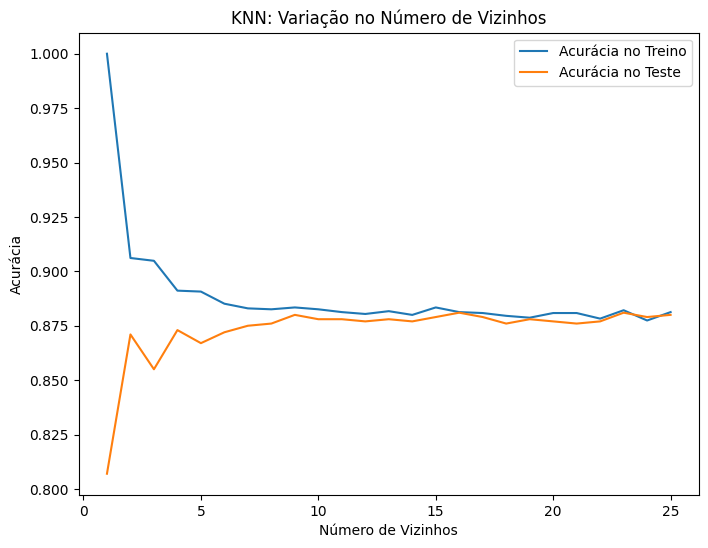

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.title("KNN: Variação no Número de Vizinhos")

plt.plot(vizinhos, acuraciasTreino.values(), label="Acurácia no Treino")
plt.plot(vizinhos, acuraciasTeste.values(), label="Acurácia no Teste")

plt.legend()
plt.xlabel("Número de Vizinhos")
plt.ylabel("Acurácia")
plt.show()